In [1]:
%matplotlib inline
import pylab 
pylab.rcParams['figure.figsize'] = (10, 8)

import os
import json
import matplotlib.pyplot as plt

from alignednotemodel import alignednotemodel

import pdb

In [2]:
folder = 'ussak--sazsemaisi--aksaksemai----dede_salih_efendi'
pitchfile = os.path.join(folder, 'pitch_corrected.json')
notefile = os.path.join(folder, 'correctedAlignedNotes.json')
tonicfile = os.path.join(folder, 'tonic.json')

modelsavefile = os.path.join(folder, 'noteModels.json')

In [3]:
pitch = json.load(open(pitchfile, 'r'))
alignednotes = json.load(open(notefile, 'r'))['notes']
tonicSymbol = json.load(open(tonicfile, 'r'))['scoreInformed']['Symbol']

In [4]:
noteModels, pitchDistibution, newTonic = alignednotemodel.getModels(pitch, alignednotes, 
                                                                    tonicSymbol,
                                                                    kernel_width=7.5, 
                                                                    step_size = 7.5)
json.dump(noteModels, open(modelsavefile, 'w'), indent=4)

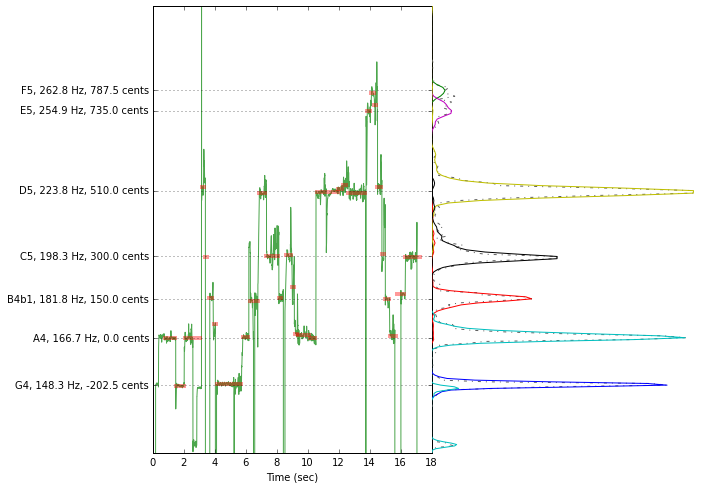

In [5]:
fig, (ax1, ax2) = alignednotemodel.plot(noteModels, pitchDistibution, alignednotes, pitch)
plt.show()
